# THE GOAL OF THIS MODEL IS TO BUILD A MACHINE LEARNING MODEL TO FIND IF THE COMPANY WILL GO BANKRUPT OR NOT USING THE FOLLOWING DATASET.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [98]:
df=pd.read_csv('american_bankruptcy.csv',names=['company_name','status','year','Current assets','Cost of goods sold','Depreciation and amortization','EBITDA','Inventory','Net Income','Total Receivables','Market Value','Net Sales','Total Assets','Total Long-term Debt','EBIT','Gross Profit','Total Current Liabilities','Retained Earnings','Total Revenue','Total Liabilities','Total Operating Expenses'],skiprows=[0])

In [99]:
df

company_name status  year  Current assets  Cost of goods sold  \
0              C_1  alive  1999         511.267             833.107   
1              C_1  alive  2000         485.856             713.811   
2              C_1  alive  2001         436.656             526.477   
3              C_1  alive  2002         396.412             496.747   
4              C_1  alive  2003         432.204             523.302   
...            ...    ...   ...             ...                 ...   
78677       C_8971  alive  2014         233.211              43.338   
78678       C_8971  alive  2015         105.559              59.184   
78679       C_8971  alive  2016          63.971              69.074   
78680       C_8971  alive  2017         135.207              66.527   
78681       C_8971  alive  2018          82.589              68.817   

       Depreciation and amortization   EBITDA  Inventory  Net Income  \
0                             18.373   89.031    336.018      35.163   
1                             18.577   64.367    320.590      18.531   
2                             22.496   27.207    286.588     -58.939   
3                             27.172   30.745    259.954     -12.410   
4                             26.680   47.491    247.245       3.504   
...                              ...      ...        ...         ...   
78677                         14.094   45.615      3.376      25.261   
78678                         42.592  202.133      2.288     129.688   
78679                         65.057   79.051      2.581      -1.442   
78680                         65.330   69.171      2.013     -20.401   
78681                         65.201   67.262      2.112     -50.946   

       Total Receivables  ...  Net Sales  Total Assets  Total Long-term Debt  \
0                128.348  ...   1024.333       740.998               180.447   
1                115.187  ...    874.255       701.854               179.987   
2                 77.528  ...    638.721       710.199               217.699   
3                 66.322  ...    606.337       686.621               164.658   
4                104.661  ...    651.958       709.292               248.666   
...                  ...  ...        ...           ...                   ...   
78677             22.846  ...    104.223      1099.101               184.666   
78678             54.611  ...    291.153      1865.926               770.103   
78679             42.467  ...    169.858      1746.235               683.985   
78680             27.217  ...    161.884      1736.110               694.035   
78681             45.839  ...    160.513      1625.370               632.122   

          EBIT  Gross Profit  Total Current Liabilities  Retained Earnings  \
0       70.658       191.226                    163.816            201.026   
1       45.790       160.444                    125.392            204.065   
2        4.711       112.244                    150.464            139.603   
3        3.573       109.590                    203.575            124.106   
4       20.811       128.656                    131.261            131.884   
...        ...           ...                        ...                ...   
78677   31.521        60.885                     28.197             28.095   
78678  159.541       231.969                     88.128            157.783   
78679   13.994       100.784                     85.765            156.341   
78680    3.841        95.357                     82.010            135.941   
78681    2.061        91.696                     79.365             84.995   

       Total Revenue  Total Liabilities  Total Operating Expenses  
0           1024.333            401.483                   935.302  
1            874.255            361.642                   809.888  
2            638.721            399.964                   611.514  
3            606.337            391.633                   575.592  
4            651.958            407.608           

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   78682 non-null  object 
 1   status                         78682 non-null  object 
 2   year                           78682 non-null  int64  
 3   Current assets                 78682 non-null  float64
 4   Cost of goods sold             78682 non-null  float64
 5   Depreciation and amortization  78682 non-null  float64
 6   EBITDA                         78682 non-null  float64
 7   Inventory                      78682 non-null  float64
 8   Net Income                     78682 non-null  float64
 9   Total Receivables              78682 non-null  float64
 10  Market Value                   78682 non-null  float64
 11  Net Sales                      78682 non-null  float64
 12  Total Assets                   78682 non-null 

In [101]:
df.drop('company_name',inplace=True,axis=1)

In [102]:
df.describe()

year  Current assets  Cost of goods sold  \
count  78682.000000    78682.000000        78682.000000   
mean    2007.506317      880.362485         1594.529029   
std        5.742768     3928.564794         8930.484664   
min     1999.000000       -7.760000         -366.645000   
25%     2002.000000       18.924000           17.038250   
50%     2007.000000      100.449500          103.661000   
75%     2012.000000      431.526750          634.548000   
max     2018.000000   169662.000000       374623.000000   

       Depreciation and amortization        EBITDA     Inventory  \
count                   78682.000000  78682.000000  78682.000000   
mean                      121.234256    376.759424    201.605717   
std                       652.376804   2012.023142   1060.766096   
min                         0.000000 -21913.000000      0.000000   
25%                         1.192000     -0.811000      0.000000   
50%                         7.929500     15.034500      7.023000   
75%                        47.971750    139.655250     74.747250   
max                     28430.000000  81730.000000  62567.000000   

          Net Income  Total Receivables  Market Value      Net Sales  \
count   78682.000000       78682.000000  7.868200e+04   78682.000000   
mean      129.382453         286.832743  3.414355e+03    2364.019706   
std      1265.532022        1335.978571  1.841410e+04   11950.068842   
min    -98696.000000          -0.006000  1.000000e-04   -1964.999000   
25%        -7.415750           3.281250  3.498000e+01      27.548500   
50%         1.616000          22.820000  2.275118e+02     186.598500   
75%        40.144250         131.580500  1.244890e+03    1046.402500   
max    104821.000000       65812.000000  1.073391e+06  511729.000000   

        Total Assets  Total Long-term Debt          EBIT   Gross Profit  \
count   78682.000000          78682.000000  78682.000000   78682.000000   
mean     2867.110620            722.483710    255.525035     769.490783   
std     12917.944421           3242.170946   1494.643534    3774.703114   
min         0.001000             -0.023000 -25913.000000  -21536.000000   
25%        37.363500              0.000000     -2.787000       8.521250   
50%       213.203500              7.593500      6.518000      63.581500   
75%      1171.364750            248.760750     87.599000     344.074250   
max    531864.000000         166250.000000  71230.000000  137106.000000   

       Total Current Liabilities  Retained Earnings  Total Revenue  \
count               78682.000000       78682.000000   78682.000000   
mean                  610.072255         532.467069    2364.019706   
std                  2938.387443        6369.159440   11950.068842   
min                     0.001000     -102362.000000   -1964.999000   
25%                     8.889250         -68.282750      27.548500   
50%                    43.333000          -1.131000     186.598500   
75%                   222.817000         146.070000    1046.402500   
max                116866.000000      402089.000000  511729.000000   

       Total Liabilities  Total Operating Expenses  
count       78682.000000              78682.000000  
mean         1773.563963               1987.260307  
std          8053.684902              10419.629038  
min             0.001000               -317.197000  
25%            13.486000                 32.872500  
50%            81.988000                168.912000  
75%           629.975000                875.522250  
max        337980.000000             481580.000000

In [103]:
df['status'].unique()

array(['alive', 'failed'], dtype=object)

In [104]:
df.isnull().sum()

status                           0
year                             0
Current assets                   0
Cost of goods sold               0
Depreciation and amortization    0
EBITDA                           0
Inventory                        0
Net Income                       0
Total Receivables                0
Market Value                     0
Net Sales                        0
Total Assets                     0
Total Long-term Debt             0
EBIT                             0
Gross Profit                     0
Total Current Liabilities        0
Retained Earnings                0
Total Revenue                    0
Total Liabilities                0
Total Operating Expenses         0
dtype: int64

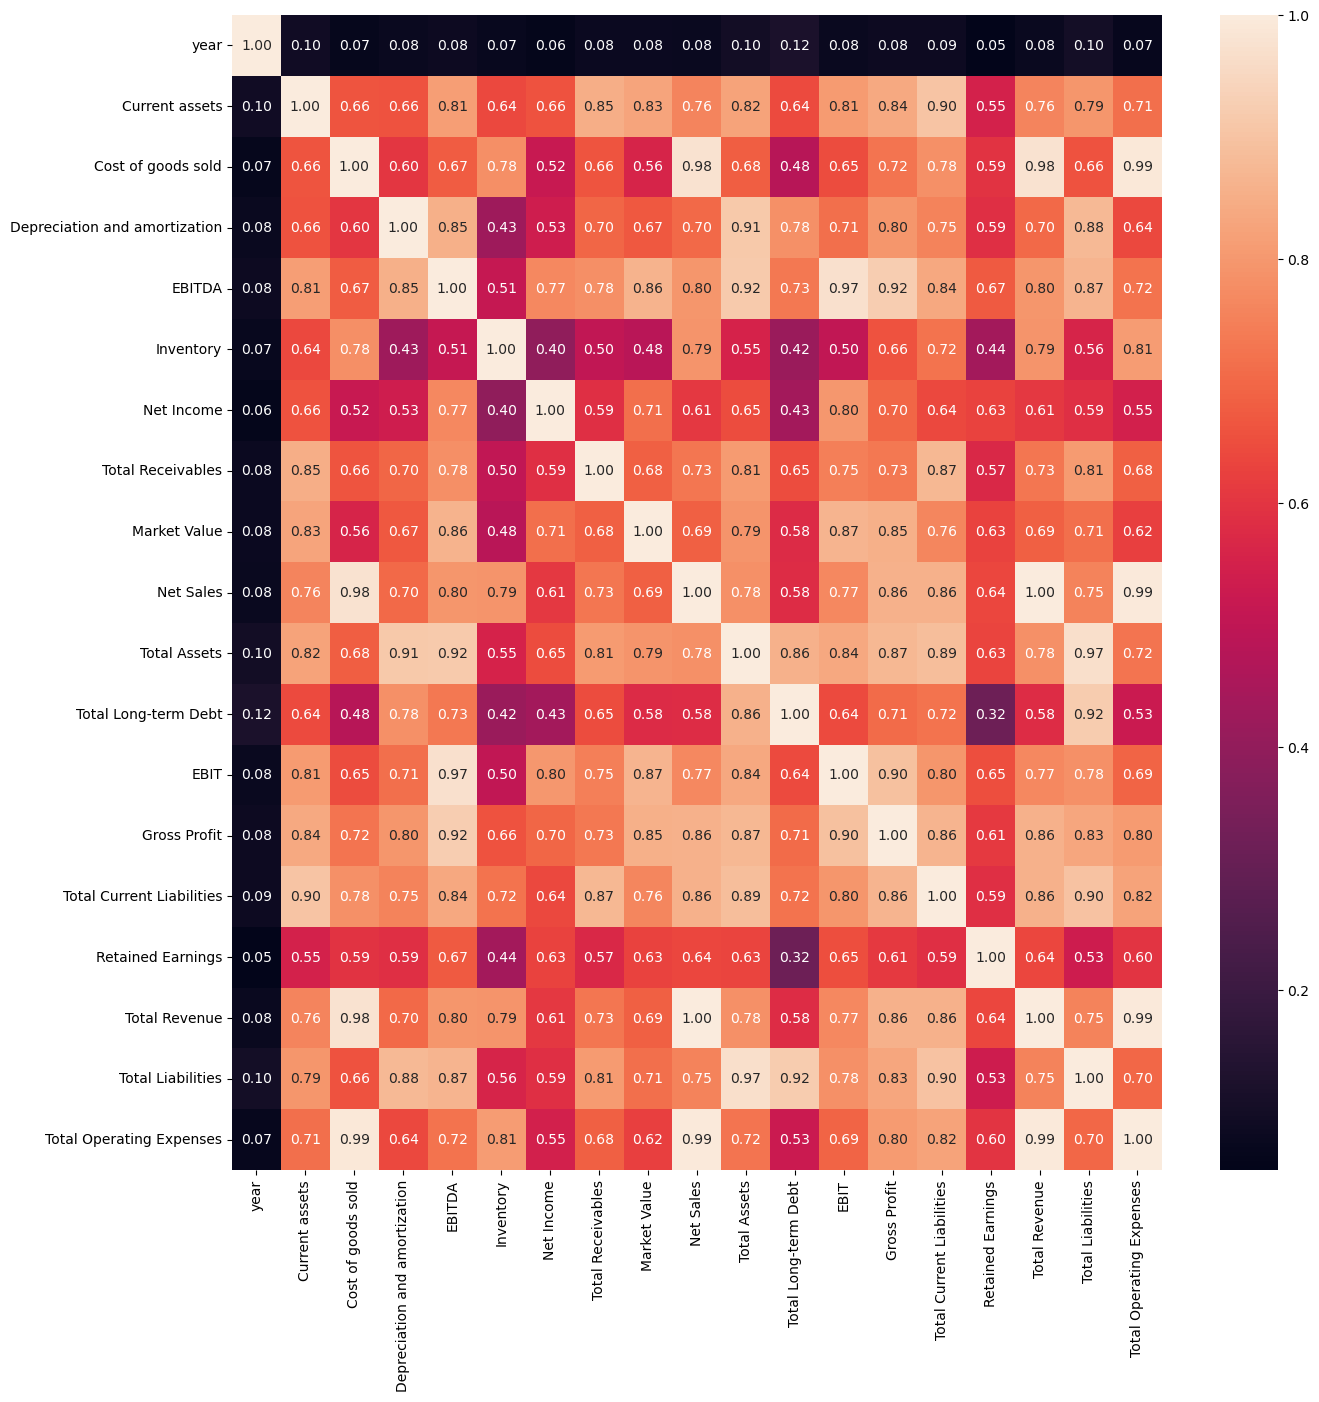

In [105]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

<Figure size 1500x1000 with 0 Axes>

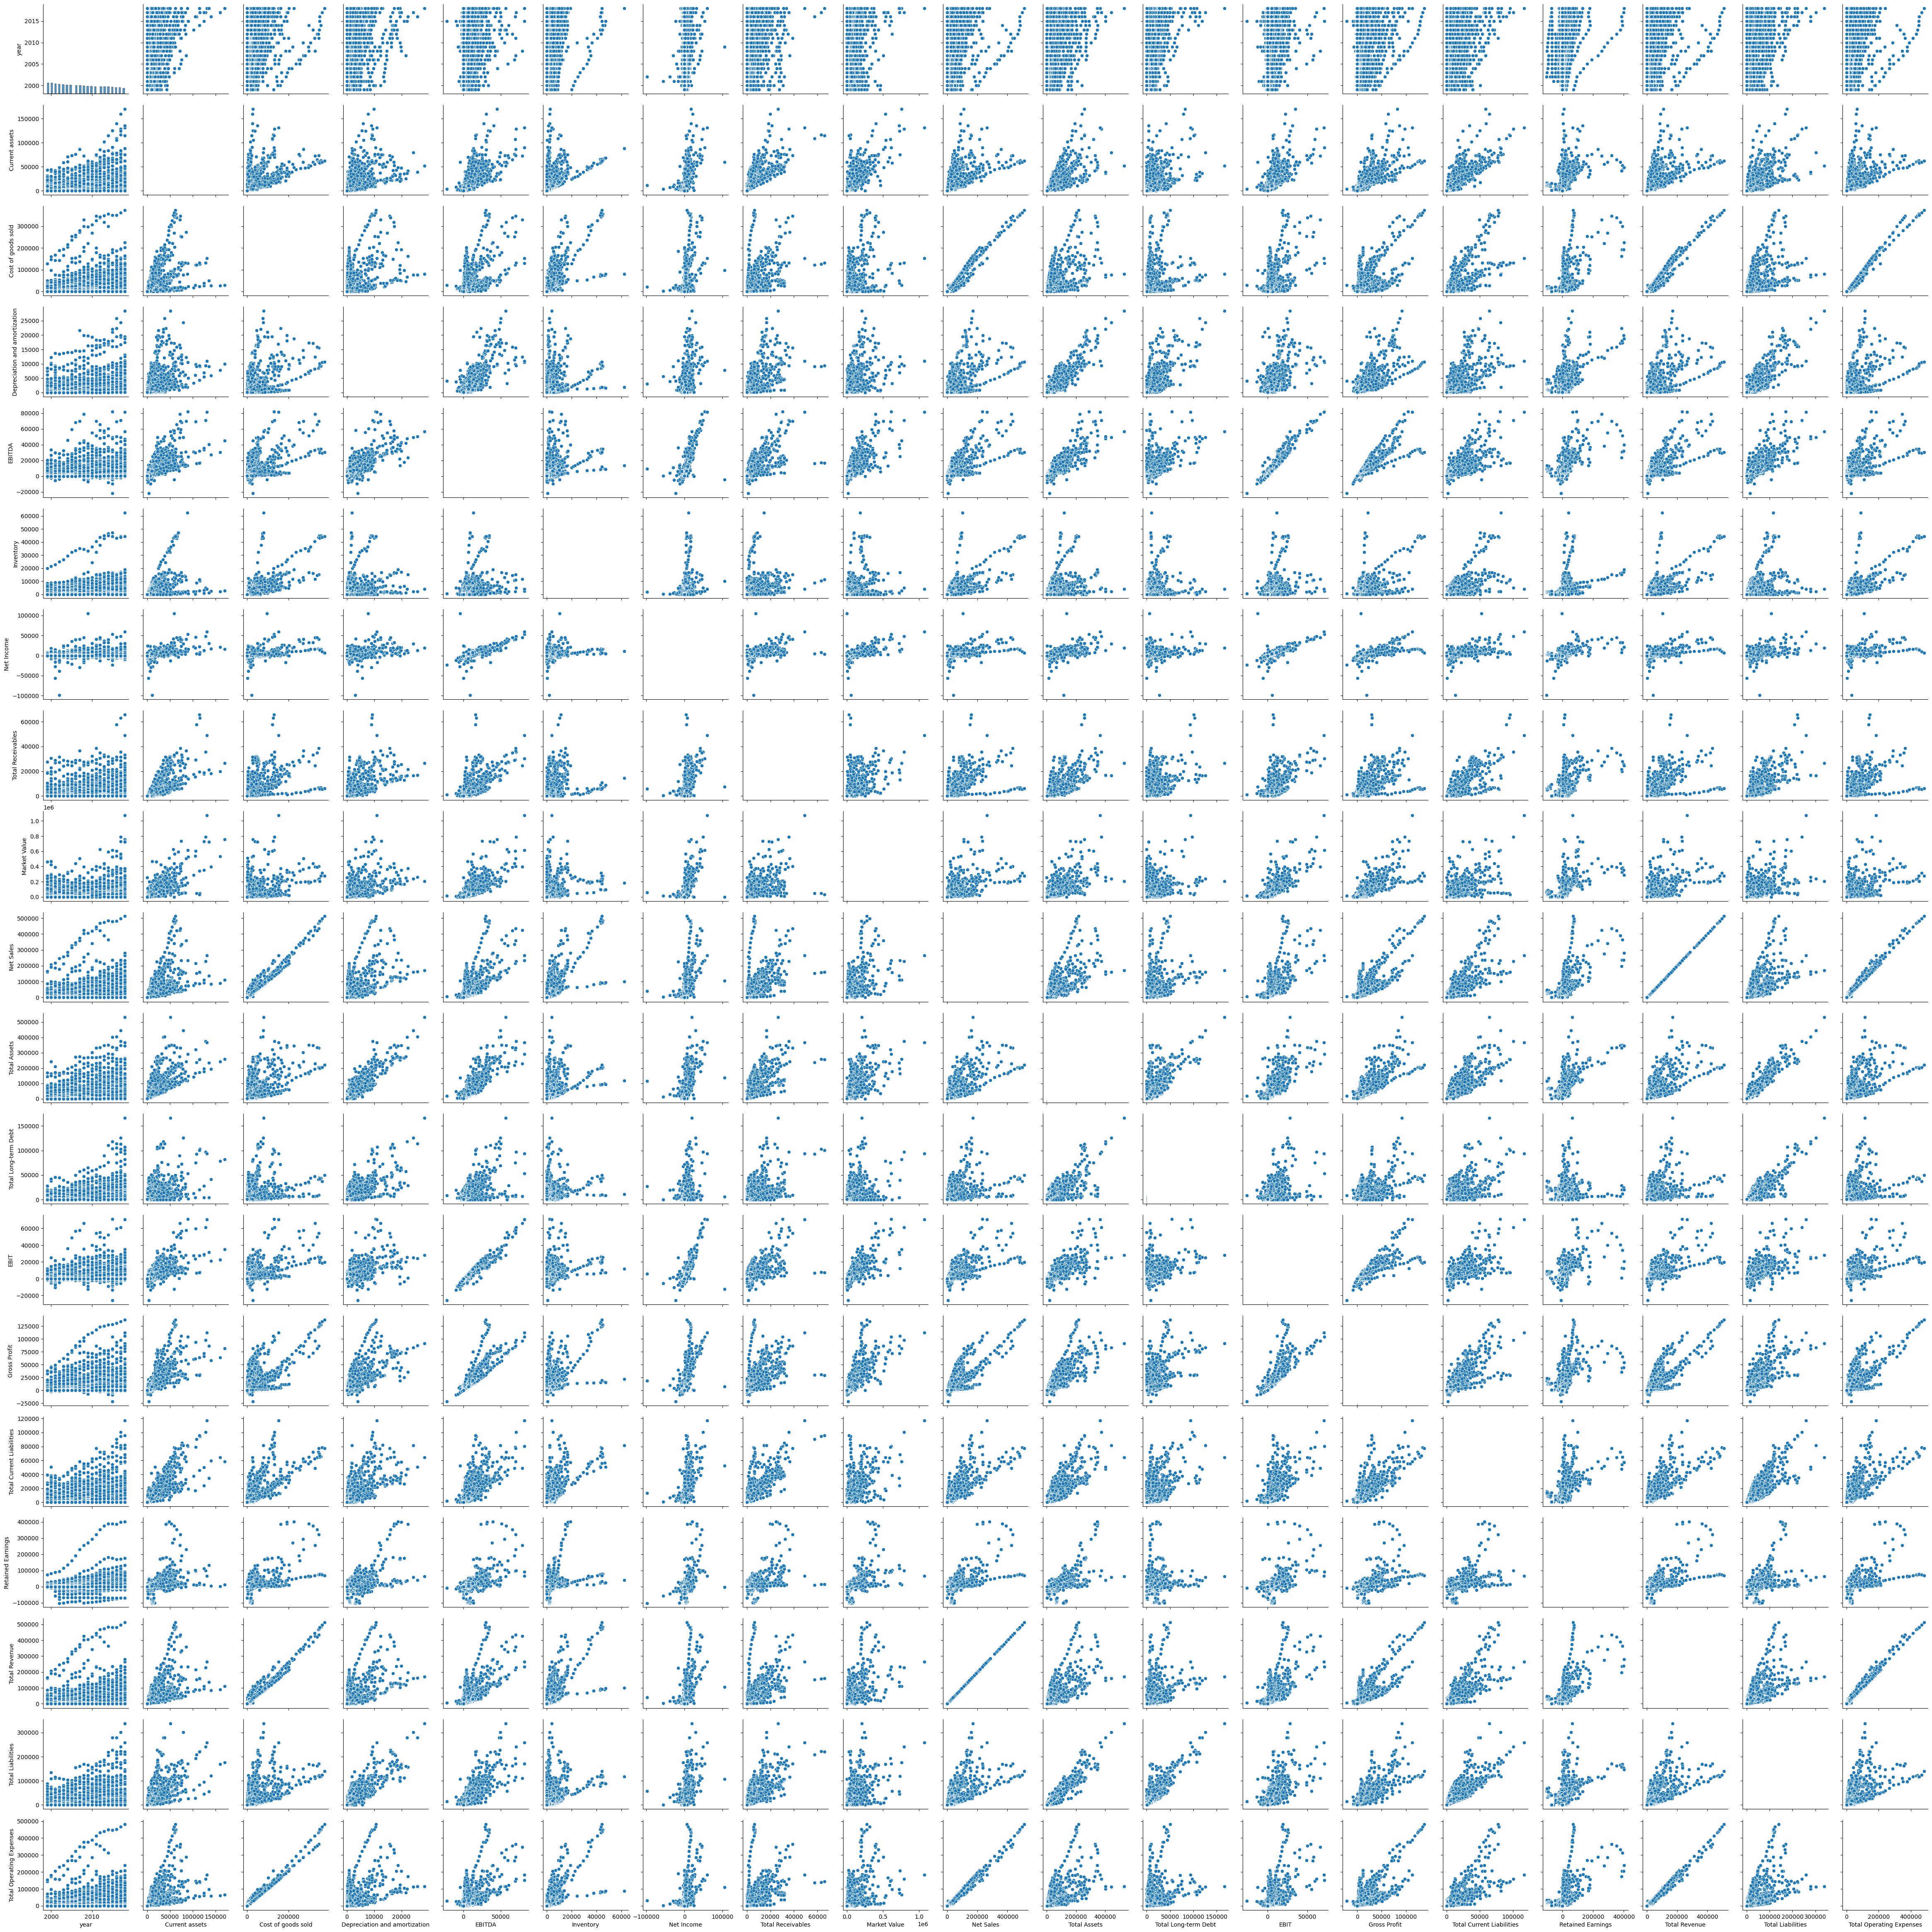

In [106]:

plt.figure(figsize=(15,10))
sns.pairplot(data=df)
plt.show()

<AxesSubplot:xlabel='status', ylabel='count'>

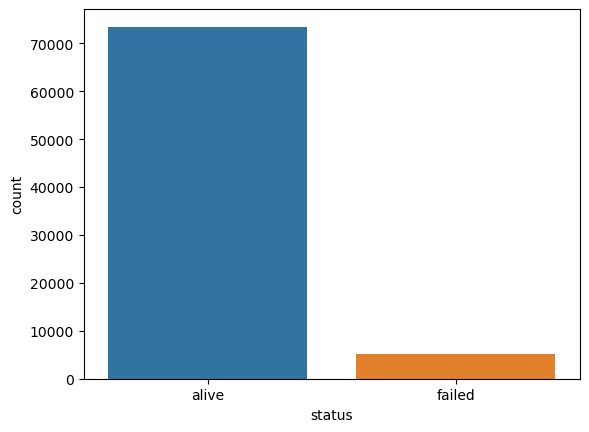

In [107]:
sns.countplot(df['status'])

In [108]:
# ITS A HIGHLY IMBALANCED DATASET

# SVM

In [109]:
from sklearn.svm import SVC

In [110]:
svc=SVC()

In [111]:
X=df.drop('status',axis=1)
y=df['status']

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=50)


In [113]:
from sklearn.preprocessing import StandardScaler
mms=StandardScaler()
X_train=mms.fit_transform(X_train)
X_test=mms.transform(X_test)

In [114]:
svc.fit(X_train,y_train)

SVC()

In [115]:
y_pred=svc.predict(X_train)
y_test_pred=svc.predict(X_test)

In [116]:
from sklearn.metrics import classification_report,confusion_matrix

In [117]:
print('TRAIN DATA')
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))
print('TEST DATA')
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

TRAIN DATA
              precision    recall  f1-score   support

       alive       0.93      1.00      0.97     55042
      failed       0.97      0.01      0.02      3969

    accuracy                           0.93     59011
   macro avg       0.95      0.50      0.49     59011
weighted avg       0.94      0.93      0.90     59011

[[55041     1]
 [ 3934    35]]
TEST DATA
              precision    recall  f1-score   support

       alive       0.94      1.00      0.97     18420
      failed       0.86      0.00      0.01      1251

    accuracy                           0.94     19671
   macro avg       0.90      0.50      0.49     19671
weighted avg       0.93      0.94      0.91     19671

[[18419     1]
 [ 1245     6]]


### LOOKING AT THIS SVM MODEL WE CAN CONCLUDE ALTHOUGH IT HAS HIGH PRECISION AND ACCURACY BUT THOSE LOW RECALL AND CONFUSION MATRIX SUGGESTS WE IT FACES PROBLEM WHILE PREDICTING 'failed' CLASS IN THE DATA.

# LOGISTIC REGRESSION

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
log=LogisticRegression()

In [120]:
log.fit(X_train,y_train)

LogisticRegression()

In [121]:
y_pred=log.predict(X_train)
y_test_pred=log.predict(X_test)

In [122]:
print(classification_report(y_train,y_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

       alive       0.93      1.00      0.97     55042
      failed       0.50      0.01      0.02      3969

    accuracy                           0.93     59011
   macro avg       0.72      0.50      0.49     59011
weighted avg       0.90      0.93      0.90     59011

              precision    recall  f1-score   support

       alive       0.94      1.00      0.97     18420
      failed       0.41      0.01      0.01      1251

    accuracy                           0.94     19671
   macro avg       0.67      0.50      0.49     19671
weighted avg       0.90      0.94      0.91     19671



### The model achieves precision, recall, and F1-scores around 0.64 for both classes ("0" and "1").

# XGBOOST

In [123]:
from xgboost import XGBClassifier

In [124]:
xgb=XGBClassifier()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['status']=le.fit_transform(df['status'])

In [125]:
X=df.drop('status',axis=1)
y=df['status']

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=50)
from sklearn.preprocessing import StandardScaler
mms=StandardScaler()
X_train=mms.fit_transform(X_train)
X_test=mms.transform(X_test)

In [128]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [129]:
y_pred=xgb.predict(X_train)
y_test_pred=xgb.predict(X_test)

In [130]:
from sklearn.metrics import classification_report,confusion_matrix

In [131]:
print('TRAIN DATA')
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))

TRAIN DATA
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     55042
           1       0.99      0.37      0.54      3969

    accuracy                           0.96     59011
   macro avg       0.97      0.68      0.76     59011
weighted avg       0.96      0.96      0.95     59011

[[55030    12]
 [ 2507  1462]]


In [132]:
print('TEST DATA')
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

TEST DATA
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18420
           1       0.69      0.12      0.20      1251

    accuracy                           0.94     19671
   macro avg       0.82      0.56      0.59     19671
weighted avg       0.93      0.94      0.92     19671

[[18355    65]
 [ 1103   148]]


# UPSAMPLING USING SMOTE

In [133]:
from imblearn.over_sampling import SMOTE

In [134]:
smote = SMOTE()

X, y= smote.fit_resample(X, y)

print(y.value_counts())

0    73462
1    73462
Name: status, dtype: int64


In [135]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=50)
from sklearn.preprocessing import MinMaxScaler
mms=StandardScaler()
X_train=mms.fit_transform(X_train)

X_test=mms.transform(X_test)

In [136]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [137]:
y_pred=xgb.predict(X_train)
y_test_pred=xgb.predict(X_test)

In [138]:
from sklearn.metrics import classification_report,confusion_matrix

In [139]:
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90     55219
           1       0.88      0.94      0.91     54974

    accuracy                           0.90    110193
   macro avg       0.91      0.90      0.90    110193
weighted avg       0.91      0.90      0.90    110193

[[47948  7271]
 [ 3274 51700]]


In [140]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87     18243
           1       0.85      0.92      0.88     18488

    accuracy                           0.88     36731
   macro avg       0.88      0.88      0.88     36731
weighted avg       0.88      0.88      0.88     36731

[[15176  3067]
 [ 1467 17021]]


# Overall, the XGBoost model demonstrates strong predictive capabilities, achieving high accuracy and balanced precision, recall, and F1-scores for both classes with 90% and 88% accuracy in training and testing respectively.

# HYPER PARAMETER TUNING

In [141]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [142]:
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5,15,20,35,50],
    'n_estimators': [100, 200, 300,400,500]
}


In [55]:
random=RandomizedSearchCV(xgb,param_distributions=param_grid,cv=5)

In [56]:
random.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_threshold=None,
                            

In [61]:
random.best_params_

{'n_estimators': 300, 'max_depth': 15, 'learning_rate': 0.2}

In [57]:

y_pred=random.predict(X_train)
y_test_pred=random.predict(X_test)

In [60]:
print('TRAIN DATA')
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))
print('TEST DATA')
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

TRAIN DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55219
           1       1.00      1.00      1.00     54974

    accuracy                           1.00    110193
   macro avg       1.00      1.00      1.00    110193
weighted avg       1.00      1.00      1.00    110193

[[55219     0]
 [    0 54974]]
TEST DATA
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     18243
           1       0.95      0.99      0.97     18488

    accuracy                           0.97     36731
   macro avg       0.97      0.97      0.97     36731
weighted avg       0.97      0.97      0.97     36731

[[17295   948]
 [  277 18211]]


### It is possible that the model might be slightly overfitting the training data. 

In [ ]:
grid=GridSearchCV(xgb,param_grid=param_grid,cv=5)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:

y_pred=random.predict(X_train)
y_test_pred=random.predict(X_test)

In [ ]:
print('TRAIN DATA')
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))
print('TEST DATA')
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

# DECISION TREE CLASSIFIER

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
dtc=DecisionTreeClassifier()

In [145]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [146]:
y_pred=dtc.predict(X_train)
y_test_pred=dtc.predict(X_test)

In [147]:
print(classification_report(y_train,y_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55219
           1       1.00      1.00      1.00     54974

    accuracy                           1.00    110193
   macro avg       1.00      1.00      1.00    110193
weighted avg       1.00      1.00      1.00    110193

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     18243
           1       0.87      0.91      0.89     18488

    accuracy                           0.89     36731
   macro avg       0.89      0.88      0.89     36731
weighted avg       0.89      0.89      0.89     36731



### The perfect precision, recall, and F1-scores of 1.00 on the training data indicate that its a Overfitting

# RANDOM FOREST CLASSIFIER

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rtc=RandomForestClassifier()

In [150]:
rtc.fit(X_train,y_train)

RandomForestClassifier()

In [151]:
y_pred=rtc.predict(X_train)
y_test_pred=rtc.predict(X_test)

In [152]:
print('TRAIN DATA')
print(classification_report(y_train,y_pred))
print('TEST DATA')
print(classification_report(y_test,y_test_pred))

TRAIN DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55219
           1       1.00      1.00      1.00     54974

    accuracy                           1.00    110193
   macro avg       1.00      1.00      1.00    110193
weighted avg       1.00      1.00      1.00    110193

TEST DATA
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     18243
           1       0.95      0.97      0.96     18488

    accuracy                           0.96     36731
   macro avg       0.96      0.96      0.96     36731
weighted avg       0.96      0.96      0.96     36731



### The perfect precision, recall, and F1-scores of 1.00 on the training data, along with the near-perfect scores on the testing data, suggest that the model has likely memorized the training data and is not generalizing well to unseen data. This is a clear indication of overfitting.

# GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [155]:
gbc=GradientBoostingClassifier()

In [156]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [157]:
y_pred=gbc.predict(X_train)
y_test_pred=gbc.predict(X_test)

In [158]:
print(classification_report(y_train,y_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74     55219
           1       0.73      0.81      0.77     54974

    accuracy                           0.76    110193
   macro avg       0.76      0.76      0.75    110193
weighted avg       0.76      0.76      0.75    110193

              precision    recall  f1-score   support

           0       0.78      0.69      0.73     18243
           1       0.73      0.81      0.76     18488

    accuracy                           0.75     36731
   macro avg       0.75      0.75      0.75     36731
weighted avg       0.75      0.75      0.75     36731



# The model achieves around 76% & 75 accuracy, precision, recall, and F1-scores for both classes. This indicates that the model can predict the classes with moderate accuracy on both Training and Testing Respectively.

# BAGGING CLASSIFIER

In [159]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix





bagging_rf = BaggingClassifier()



In [161]:

bagging_rf.fit(X_train, y_train)


y_train_pred = bagging_rf.predict(X_train)
y_test_pred = bagging_rf.predict(X_test)


print('TRAIN DATA')
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

print('TEST DATA')
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))


TRAIN DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55219
           1       1.00      1.00      1.00     54974

    accuracy                           1.00    110193
   macro avg       1.00      1.00      1.00    110193
weighted avg       1.00      1.00      1.00    110193

[[55132    87]
 [  154 54820]]
TEST DATA
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     18243
           1       0.93      0.94      0.94     18488

    accuracy                           0.93     36731
   macro avg       0.93      0.93      0.93     36731
weighted avg       0.93      0.93      0.93     36731

[[16885  1358]
 [ 1048 17440]]


### Based on these results, it appears that the BaggingClassifier is overfitting the training data and does not generalize well to the testing data.

# KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn=KNeighborsClassifier(n_neighbors=9)

In [23]:
knn.fit(X_train,y_train)
y_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)

In [29]:
print('TRAIN DATA')
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

print('TEST DATA')
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test,y_test_pred))


TRAIN DATA
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     55042
           1       0.84      0.06      0.11      3969

    accuracy                           0.94     59011
   macro avg       0.89      0.53      0.54     59011
weighted avg       0.93      0.94      0.91     59011

[[54997    45]
 [ 3727   242]]
TEST DATA
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18420
           1       0.58      0.04      0.07      1251

    accuracy                           0.94     19671
   macro avg       0.76      0.52      0.52     19671
weighted avg       0.92      0.94      0.91     19671

[[18385    35]
 [ 1203    48]]


### low recall, F1-score, and precision for class 1. This suggests that the model has difficulties capturing the patterns or features associated with failed instances.

# PCA

In [162]:
from sklearn.decomposition import PCA

In [163]:
sc=StandardScaler()

In [164]:
pc=PCA(n_components=5)

In [165]:
X_s=sc.fit_transform(X)

In [166]:
pc.fit(X_s)
X_t=pc.transform(X_s)

In [167]:
pc.components_

array([[ 3.04407239e-02,  2.46351830e-01,  2.33376880e-01,
         2.31093400e-01,  2.57998487e-01,  1.92628561e-01,
         1.84881156e-01,  2.34769728e-01,  2.29577376e-01,
         2.55965015e-01,  2.57974718e-01,  2.00178147e-01,
         2.44228457e-01,  2.59758623e-01,  2.59613105e-01,
         1.80810650e-01,  2.55965015e-01,  2.46606960e-01,
         2.43219319e-01],
       [-7.89016614e-02, -3.69441023e-02,  3.88919607e-01,
        -2.19587414e-01, -2.04997153e-01,  4.40563284e-01,
        -1.43399796e-01, -9.64405842e-02, -1.75708841e-01,
         2.82335064e-01, -1.99417682e-01, -3.01603814e-01,
        -1.77820372e-01, -2.81449311e-02,  2.24064045e-02,
         2.08314199e-02,  2.82335064e-01, -2.04697413e-01,
         3.61479110e-01],
       [ 2.05593827e-01, -1.19556086e-02,  5.20985735e-02,
         1.85292311e-01, -1.24751172e-01,  1.03766579e-01,
        -5.03771569e-01,  4.83522138e-02, -2.51522888e-01,
         2.31213010e-02,  1.45804532e-01,  4.30694008e-01,
    

In [168]:
pc.explained_variance_ratio_

array([0.68748537, 0.08125736, 0.06409237, 0.05140839, 0.0298216 ])

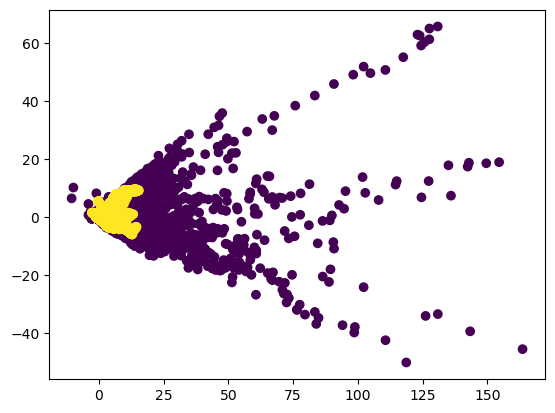

In [169]:
plt.scatter(X_t[:,0],X_t[:,1],c=y)
plt.show()

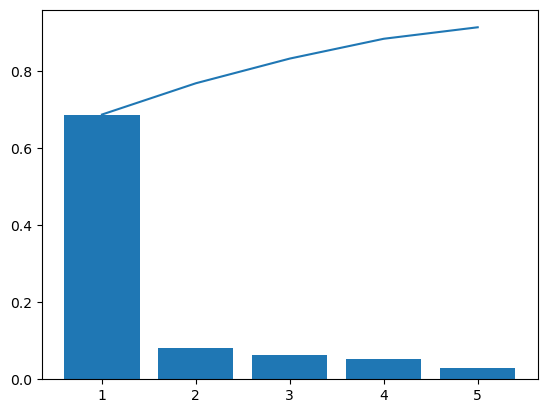

In [170]:
plt.bar(np.arange(1,6),pc.explained_variance_ratio_)
plt.plot(np.arange(1,6),np.cumsum(pc.explained_variance_ratio_))

#### The first principal component explains approximately 68.62% of the total variance in the data.


#### The second principal component explains approximately 8.14% of the total variance.

#### The third principal component explains approximately 6.48% of the total variance.

#### The fourth principal component explains approximately 5.15% of the total variance

#### The fifth principal component explains approximately 2.99% of the total variance.

# you will find that they explain approximately 83.24% of the total variance. 

# CONCLUSION

In [171]:
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'XGBoost': XGBClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Bagging': BaggingClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=9)
}


In [ ]:
for i,j in models.items():
    
    print(f'Model: {i}')
    if i == 'XGBoost':
        random = RandomizedSearchCV(j, param_distributions=param_grid, cv=5)
        random.fit(X_train, y_train)
        j = random.best_estimator_
    j.fit(X_train,y_train)
    y_train_pred = j.predict(X_train)
    y_test_pred = j.predict(X_test)
    print("TRAIN DATA")
    print(classification_report(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))
    print("TEST DATA")
    print(classification_report(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

Model: SVM
TRAIN DATA
              precision    recall  f1-score   support

           0       0.77      0.48      0.60     55219
           1       0.62      0.86      0.72     54974

    accuracy                           0.67    110193
   macro avg       0.70      0.67      0.66    110193
weighted avg       0.70      0.67      0.66    110193

[[26756 28463]
 [ 7773 47201]]
TEST DATA
              precision    recall  f1-score   support

           0       0.77      0.48      0.59     18243
           1       0.63      0.86      0.72     18488

    accuracy                           0.67     36731
   macro avg       0.70      0.67      0.66     36731
weighted avg       0.70      0.67      0.66     36731

[[ 8823  9420]
 [ 2634 15854]]
Model: Logistic Regression
TRAIN DATA
              precision    recall  f1-score   support

           0       0.66      0.57      0.61     55219
           1       0.62      0.71      0.66     54974

    accuracy                           0.64    110

### WE CAN CONCLUDE THAT XGBOOST MODEL IS CLOSE TO BEING THE MOST OPTIMAL MODEL FOR OUR DATASET GIVING US THE ACCURACY OF 90% & 87% WITHOUT CAUSING OVERFITTING OR BIAS TO ANY DATA.